# **_Análise de empresas com base nos Dados Abertos do Governo Federal_**
# _Parte 1_

## **Apresentação**


Para um profissional ou empresa que oferta produtos e/ou serviços, ter o conhecimento do local onde se situam seus clientes pode ser um diferencial muito grande a ser explorado em seu favor. Serviços de _leading_ e carteiras de clientes são ofertados por diversas empresas do ramo, mas quase sempre são serviços caros, o que os tornam proibitivos para os pequenos empreendedores. O **Governo Federal Brasileiro** disponibiliza para _download_ os dados de todas as empresas com CNPJ aberto no Brasil na forma de dados públicos, os mesmos muitas vezes utilizadas pelas empresas de _leading_ e de venda de carteira de clientes. Dessa forma, utilizando-se das ferramentas e recursos disponíveis para a tarefa de Análise de Dados, foi-se elaborado um tutorial para possibilitar a aquisição dos dados de interesse ao usuário, desde a aquisição dos dados até a geração do arquivo csv final, que poderá ser analisado em qualquer ferramenta de análise como Excel, Power BI etc, na segmentação de clientes, análise por localidade, nicho das empresas por local, entre inúmeras outras possibilidades.


Os dados abertos sobre as empresas podem ser acessados pelo link:

<br>

[Cadastro Nacional da Pessoa Jurídica - CNPJ ](https://dados.gov.br/dataset/cadastro-nacional-da-pessoa-juridica-cnpj)

<br>

Os dados utilizados para este projeto são os da versão de 09/07/2022.

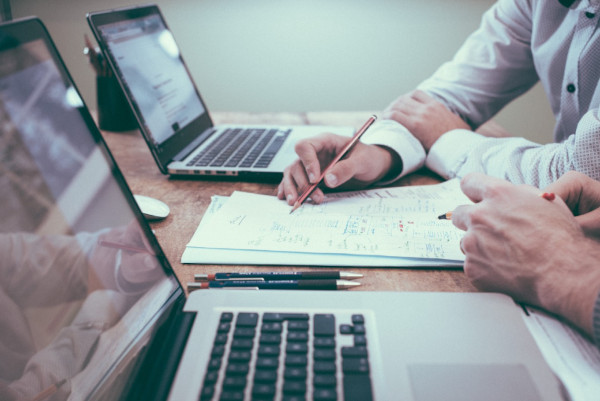

Devido às particularidades de cada etapa do projeto, o mesmo foi dividido em 4 partes, conforme a seguir:

* Parte 1: Seleção das features mais relevantes dos dados dos ESTABELECIMENTOS e seleção do município de interesse;
* Parte 2: Seleção das features mais relevantes dos dados das EMPRESAS e junção com o arquivo gerado na parte 1;
* Parte 3: Correção de endereços, categorização, etc;
* Parte 4: Limpeza, formatação e geração do arquivo *.csv finalizado.

O notebook do projeto pode ser acessado através do [GitHub](https://github.com/lflaviop/analise_empresas).

## **Introdução**
Esta primeira parte do trabalho tem por finalidade gerar um arquivo *.csv que contenha apenas os dados mais relevantes do município de interesse do usuário baseado nos arquivos dos ESTABELECIMENTOS fornecidos pelo Governo Federal. Após a seleção, filtragem e tratamento dos dados, será gerado um arquivo que será utilizado na parte 2 deste projeto.

## **Motivação**

Além de uma ótima oportunidade para o estudo de diversas técnicas de Análise de Dados, com a utilização de dados reais, este projeto foi motivado pelo fato de se poder gerar meios para que qualquer pessoa ou empresa interessada possa obter informações sobre as empresas de interesse para o seu local de interesse. Isso poderá lhe fornecer meios de melhorar seu negócio, otimizar a prospecção de novos clientes, possibiltar uma análise sobre as empresas em geral etc. 

## **Execução da primeira parte do projeto**

Os arquivos disponibilizados pelo Governo Federal estão separados por categorias e divididos em diversos arquivos devido aos seus tamanhos. Após a descompactação eles se tornam muito grandes e por isso os mesmos foram armazenados no Google Drive após o _download_. Cada categoria possui as informações relativas ao seu tema e dessa forma diversas técnicas de juntar as tabelas tem de ser realizados para possibilitar uma visão global das empresas.
As principais etapas da 1ª parte são descritas abaixo:

* obtenção dos dados relativos ao ESTABELECIMENTO;
* remoção das features desnecessárias ao escopo deste projeto;
* filtragem pelo(s) município(s) de interesse;
* tratamento dos dados;
* geração de arquivo de dados com as informações de interesse para o estabelecimento.


## **Importante**

Por conveniência o projeto foi todo realizado no ambiente de desenvolvimento `Google Colab` (memória disponibilizada e possibilidade de se utilizar os arquivos diretamente do Google Drive). Entretanto, o mesmo pode ser executado em qualquer outro ambiente de desenvolvimento desde que as bibliotecas, recursos e a base de dados necessários à execução estejam disponíveis.

In [ ]:
# Importacao das bibliotecas necessarias a execucao das rotinas

from zipfile import ZipFile
import pandas as pd

In [ ]:
# Lista para iteracao e descompactacao dos arquivos no ambiente do Google Colab
# Importante: o caminho das pastas devera ser alterado conforme o drive do usuario

zip_files = ['Estabelecimentos0.zip', 'Estabelecimentos1.zip', 'Estabelecimentos2.zip',
             'Estabelecimentos3.zip', 'Estabelecimentos4.zip', 'Estabelecimentos5.zip',
             'Estabelecimentos6.zip', 'Estabelecimentos7.zip', 'Estabelecimentos8.zip',
             'Estabelecimentos9.zip']

drive_path = '/content/drive/MyDrive/cnpj_dados/'

In [ ]:
# Descompactacao dos arquivos

for file_ in zip_files:
    path = drive_path + file_
    
    with ZipFile(path, mode="r") as archive:
        archive.extractall()
    
    print(f'O arquivo {file_} foi descompactado.')

O arquivo Estabelecimentos0.zip foi descompactado.
O arquivo Estabelecimentos1.zip foi descompactado.
O arquivo Estabelecimentos2.zip foi descompactado.
O arquivo Estabelecimentos3.zip foi descompactado.
O arquivo Estabelecimentos4.zip foi descompactado.
O arquivo Estabelecimentos5.zip foi descompactado.
O arquivo Estabelecimentos6.zip foi descompactado.
O arquivo Estabelecimentos7.zip foi descompactado.
O arquivo Estabelecimentos8.zip foi descompactado.
O arquivo Estabelecimentos9.zip foi descompactado.


In [ ]:
!ls

drive				K3241.K03200Y5.D20709.ESTABELE
K3241.K03200Y0.D20709.ESTABELE	K3241.K03200Y6.D20709.ESTABELE
K3241.K03200Y1.D20709.ESTABELE	K3241.K03200Y7.D20709.ESTABELE
K3241.K03200Y2.D20709.ESTABELE	K3241.K03200Y8.D20709.ESTABELE
K3241.K03200Y3.D20709.ESTABELE	K3241.K03200Y9.D20709.ESTABELE
K3241.K03200Y4.D20709.ESTABELE	sample_data


In [ ]:
# Lista dos nomes dos arquivos descompactados para iteracao e busca pelo municipio escolhido pelo usuario

csv_files = ['K3241.K03200Y0.D20709.ESTABELE', 'K3241.K03200Y1.D20709.ESTABELE',
             'K3241.K03200Y2.D20709.ESTABELE', 'K3241.K03200Y3.D20709.ESTABELE', 
             'K3241.K03200Y4.D20709.ESTABELE', 'K3241.K03200Y5.D20709.ESTABELE',
             'K3241.K03200Y6.D20709.ESTABELE', 'K3241.K03200Y7.D20709.ESTABELE', 
             'K3241.K03200Y8.D20709.ESTABELE', 'K3241.K03200Y9.D20709.ESTABELE']

A documentação contendo os _layouts_ dos arquivos disponibilizados pode ser encontrada neste [link](https://www.gov.br/receitafederal/pt-br/assuntos/orientacao-tributaria/cadastros/consultas/arquivos/novolayoutdosdadosabertosdocnpj-dez2021.pdf). De qualquer forma, as tabelas abaixo apresentam uma breve descrição das características contidas nos dados referentes apenas aos estabelecimentos e a justificativa para utilização ou não das _features_ neste trabalho.
<br><br>

| **Campo**                   | **Descrição** |
|:----------------------------|:--------------|
| CNPJ BÁSICO                 | NÚMERO BASE DE INSCRIÇÃO NO CNPJ (OITO PRIMEIROS DÍGITOS DO CNPJ).|
| CNPJ ORDEM                  | NÚMERO DO ESTABELECIMENTO DE INSCRIÇÃO NO CNPJ (DO NONO ATÉ O DÉCIMO SEGUNDO DÍGITO DO CNPJ) |
| CNPJ DV                     | DÍGITO VERIFICADOR DO NÚMERO DE INSCRIÇÃO NO CNPJ (DOIS ÚLTIMOS DÍGITOS DO CNPJ)|
| IDENTIFICADOR MATRIZ/FILIAL | CÓDIGO DO IDENTIFICADOR MATRIZ/FILIAL: 1 – MATRIZ 2 – FILIAL|
| NOME FANTASIA               | CORRESPONDE AO NOME FANTASIA|
| SITUAÇÃO CADASTRAL          | CÓDIGO DA SITUAÇÃO CADASTRAL 1. NULA 2. ATIVA 3. SUSPENSA 4. INAPTA 8. BAIXADA|
| DATA SITUAÇÃO CADASTRAL     | DATA DO EVENTO DA SITUAÇÃO CADASTRAL|
| MOTIVO SITUAÇÃO CADASTRAL   | CÓDIGO DO MOTIVO DA SITUAÇÃO CADASTRAL|
| NOME DA CIDADE NO EXTERIOR  | NOME DA CIDADE NO EXTERIOR|
| PAIS                        | CÓDIGO DO PAIS|
| DATA DE INÍCIO ATIVIDADE    | DATA DE INÍCIO DA ATIVIDADE|
| CNAE FISCAL PRINCIPAL       | CÓDIGO DA ATIVIDADE ECONÔMICA PRINCIPAL DO ESTABELECIMENTO|
| CNAE FISCAL SECUNDÁRIA      | CÓDIGO DA(S) ATIVIDADE(S) ECONÔMICA(S) SECUNDÁRIA(S) DO ESTABELECIMENTO|
| TIPO DE LOGRADOURO          | DESCRIÇÃO DO TIPO DE LOGRADOURO|
| LOGRADOURO                  | NOME DO LOGRADOURO ONDE SE LOCALIZA O ESTABELECIMENTO.|
| NÚMERO                      | NÚMERO ONDE SE LOCALIZA O ESTABELECIMENTO. QUANDO NÃO HOUVER PREENCHIMENTO DO NÚMERO HAVERÁ ‘S/N’.|
| COMPLEMENTO                 | COMPLEMENTO PARA O ENDEREÇO DE LOCALIZAÇÃO DO ESTABELECIMENTO|
| BAIRRO                      | BAIRRO ONDE SE LOCALIZA O ESTABELECIMENTO.|
| CEP                         | CÓDIGO DE ENDEREÇAMENTO POSTAL REFERENTE AO LOGRADOURO NO QUAL O ESTABELECIMENTO ESTA LOCALIZADO|
| UF                          | SIGLA DA UNIDADE DA FEDERAÇÃO EM QUE SE ENCONTRA O ESTABELECIMENTO|
| MUNICÍPIO                   | CÓDIGO DO MUNICÍPIO DE JURISDIÇÃO ONDE SE ENCONTRA O ESTABELECIMENTO|
| DDD 1                       | CONTÉM O DDD 1|
| TELEFONE 1                  | CONTÉM O NÚMERO DO TELEFONE 1|
| DDD 2                       | CONTÉM O DDD 2|
| TELEFONE 2                  | CONTÉM O NÚMERO DO TELEFONE 2|
| DDD DO FAX                  | CONTÉM O DDD DO FAX|
| FAX                         | CONTÉM O NÚMERO DO FAX|
| CORREIO ELETRÔNICO          | CONTÉM O E-MAIL DO CONTRIBUINTE|
| SITUAÇÃO ESPECIAL           | SITUAÇÃO ESPECIAL DA EMPRESA|
| DATA DA SITUAÇÃO ESPECIAL   | DATA EM QUE A EMPRESA ENTROU EM SITUAÇÃO ESPECIAL|

Após análise preliminar dos dados e pautado pela motivação do projeto foram selecionadas as seguintes colunas conforme descrito abaixo.
<br><br>

|**Indíce**|**Campo**                     |**Tipo de variável**|**Utilizada?**|**Justificativa**                                                     |
|:--------:|:-----------------------------|:-------------------|:------------:|:--------------------------------------------------------------------|
| 0        | CNPJ BÁSICO                  | Objeto             | Sim          | Identificação da empresa                                              |
| 1        | CNPJ ORDEM                   | Objeto             | Sim          | Identificação da empresa                                              |
| 2        | CNPJ DV                      | Objeto             | Sim          | Identificação da empresa                                              |
| 3        | IDENTIFICADOR MATRIZ/FILIAL  | Categórica         | Sim          | Identificação da empresa                                              |
| 4        | NOME FANTASIA                | Objeto             | Sim          | Identificação da empresa                                              |
| 5        | SITUAÇÃO CADASTRAL           | Categórica         | Sim          | Situação atual da empresa                                           |
| 6        | DATA SITUAÇÃO CADASTRAL      | Datetime           | Sim          | Data da opção pela situação atual                                   |
| 7        | MOTIVO SITUAÇÃO CADASTRAL    | Objeto             | Sim          | Motivo da situação atual                                            |
| 8        | NOME DA CIDADE NO EXTERIOR   | Objeto             | Não          | Considera-se que a empresa esteja no Brasil                            |
| 9        | PAIS                         | Categórica         | Não          | Considera-se que a empresa esteja no Brasil                            |
| 10       | DATA DE INÍCIO ATIVIDADE     | Datetime           | Sim          | Data de entrada em atividade                                        |
| 11       | CNAE FISCAL PRINCIPAL        | Objeto             | Sim          | Identificação do tipo de atividade principal da empresa             |
| 12       | CNAE FISCAL SECUNDÁRIA       | Objeto             | Não          | A atividade principal é a mais relevante                            |
| 13       | TIPO DE LOGRADOURO           | Objeto             | Não          | O endereço será obtido através do CEP                               |
| 14       | LOGRADOURO                   | Objeto             | Não          | Muitos valores inconsistentes. O endereço será obtido através do CEP|
| 15       | NÚMERO                       | Objeto             | Sim          | Localização física da empresa                                              |
| 16       | COMPLEMENTO                  | Objeto             | Sim          | Localização física da empresa                                              |
| 17       | BAIRRO                       | Objeto             | Não          | Muitos valores inconsistentes. O endereço será obtido através do CEP|
| 18       | CEP                          | Objeto             | Sim          | Será utilizado para aquisição do logradouro e bairro das empresas|
| 19       | UF                           | Categórica         | Não          | A escolha pelo município torna esta informação redundante           |
| 20       | MUNICÍPIO                    | Objeto             | Sim          | Necessário para seleção do município                                |
| 21       | DDD 1                        | Objeto             | Não          | Informação com muitos dados faltantes e desatualizada               |
| 22       | TELEFONE 1                   | Objeto             | Não          | Informação com muitos dados faltantes e desatualizada               |
| 23       | DDD 2                        | Objeto             | Não          | Informação com muitos dados faltantes e desatualizada               |
| 24       | TELEFONE 2                   | Objeto             | Não          | Informação com muitos dados faltantes e desatualizada               |
| 25       | DDD DO FAX                   | Objeto             | Não          | Informação com muitos dados faltantes e desatualizada               |
| 26       | FAX                          | Objeto             | Não          | Informação com muitos dados faltantes e desatualizada               |
| 27       | CORREIO ELETRÔNICO           | Objeto             | Não          | Informação com muitos dados faltantes e desatualizada               |
| 28       | SITUAÇÃO ESPECIAL            | Objeto             | Não          |Considerada desnecessária nesta análise                             |
| 29       | DATA DA SITUAÇÃO ESPECIAL    | Datatime           | Não          |Considerada desnecessária nesta análise                                       |

In [ ]:
# Como as colunas dos arquivos originais nao possuem cabecalho faz-se necessario a sua inputacao manual,
# o que sera realizado com a lista abaixo, ja com os nomes das colunas selecionadas

nome_colunas = ['cnpj_basico', 'cnpj_ordem', 'cnpj_dv', 'identificador_matriz_filial', 'nome_fantasia',
                'situacao_cadastral', 'data_situacao_cadastral', 'motivo_situacao_cadastral',
                'nome_cidade_exterior', 'pais', 'data_de_inicio_atividade', 'cnae_fiscal_principal', 
                'cnae_secundario', 'tipo_logradouro', 'logradouro', 'numero', 'complemento', 'bairro', 
                'cep', 'uf', 'municipio', 'ddd1', 'telefone_1', 'ddd2', 'telefone_2', 'ddd_fax', 'fax', 
                'email', 'situacao_especial', 'data_situacao_especial']

In [ ]:
# Escolha do tipo de variaveis das colunas.
# Para esta parte do projeto nao e relevante a escolha precisa das variaveis, mas e importante a escolha do tipo
# string para os dados de cnpj para nao haver a perda de informacao e categoricas onde se aplicar para alivio 
# de memoria.

tipo_colunas = {'cnpj_basico':'object', 'cnpj_ordem':'object', 'cnpj_dv':'object', 
                'identificador_matriz_filial':'category', 'nome_fantasia':'object', 
                'situacao_cadastral':'category', 'motivo_situacao_cadastral':'category', 
                'cnae_fiscal_principal':'object', 'numero':'object', 'complemento':'object',
                'cep':'object', 'municipio':'object', 'data_situacao_cadastral':'object',
                'data_de_inicio_atividade':'object'}

In [ ]:
# Descompactacao do arquivo de codificacao dos municipios para utilizacao na leitura dos dados dos estabelecimentos

file_ = 'Municipios.zip'

with ZipFile(drive_path + file_, mode="r") as archive:
    archive.extractall()
    
print(f'O arquivo {file_} foi extraido.')

O arquivo Municipios.zip foi extraido.


In [ ]:
# Leitura do arquivo descompactado de municipios 

df_municipios = pd.read_csv('/content/F.K03200$Z.D20709.MUNICCSV', encoding='ISO-8859-1', 
                            header=None, sep=';', names=['codigo', 'municipio'], dtype='object')
df_municipios.head()

,codigo,municipio
0,0001,GUAJARA-MIRIM
1,0002,ALTO ALEGRE DOS PARECIS
2,0003,PORTO VELHO
3,0004,BURITIS
4,0005,JI-PARANA


In [ ]:
# Codigo do municipio para possibilitar busca. Essa informacao e facilmente obtida na internet
# Para este projeto foi escolhido o municipio de Pocos de Caldas, MG como exemplo

codigo_municipio = '5035'

# TODO
# Possibilitar busca pelo nome do municipio

In [ ]:
# Informa se a cidade possui CEP unico ou se possui CEPS por ruas ou bairros
# Caso possua CEP unico, as colunas logradouro e bairro serão mantidas; se não possuir CEP unico
# o endereço será dado pela tabela de CEP
# Informar 'S' para cidade com CEP unico ou 'N' para cidades com mais de um CEP

cep_unico = 'N'

# TODO
# Automatizar a selecao de CEP unico

In [ ]:
# Retorna o nome do municipio

munic = df_municipios[df_municipios['codigo'] == codigo_municipio]['municipio']
municipio = [i for i in munic][0]

In [ ]:
if cep_unico == 'N':
    cols_to_use = ['cnpj_basico', 'cnpj_ordem', 'cnpj_dv', 'identificador_matriz_filial', 'nome_fantasia',
                   'situacao_cadastral', 'data_situacao_cadastral', 'motivo_situacao_cadastral',
                   'data_de_inicio_atividade', 'cnae_fiscal_principal',	'numero', 'complemento',
                   'cep', 'municipio']
elif cep_unico == 'S':
    cols_to_use = ['cnpj_basico', 'cnpj_ordem', 'cnpj_dv', 'identificador_matriz_filial', 'nome_fantasia',
                   'situacao_cadastral', 'data_situacao_cadastral', 'motivo_situacao_cadastral',
                   'data_de_inicio_atividade', 'cnae_fiscal_principal',	'tipo_logradouro', 'logradouro',
                   'numero', 'complemento', 'bairro', 'cep', 'municipio']

In [ ]:
# Esta rotina efetua a busca das instancias dos municipio escolhido nos 10 arquivos csv dos estabelecimentos
# um por vez, e os armazena em um dataframe, que sera utilizado no restante do codigo

for csv in csv_files:
    # path_colab = '/content/' + csv

    if csv == 'K3241.K03200Y0.D20709.ESTABELE':
        df = pd.read_csv(csv, sep=";", encoding='ISO-8859-1', header=None, low_memory=False, 
                         usecols=cols_to_use, names=nome_colunas, dtype=tipo_colunas)
        print (f'O arquivo {csv} possui {len(df)} linhas.')
        df = df.query("municipio == @ codigo_municipio")
        print (f'O arquivo {csv} possui {len(df)} linhas referentes ao municipio de {municipio.title()}.\n')
    else:
        df2 = pd.read_csv(csv, sep=";", encoding='ISO-8859-1', header=None, low_memory=False, 
                          usecols=cols_to_use, names=nome_colunas, dtype=tipo_colunas)
        print (f'O arquivo {csv} possui {len(df2)} linhas.')        
        df2 = df2.query("municipio == @ codigo_municipio")
        print (f'O arquivo {csv} possui {len(df2)} linhas referentes ao municipio de {municipio.title()}.\n')
        df = pd.concat([df, df2], ignore_index=True)

O arquivo K3241.K03200Y0.D20709.ESTABELE possui 10431926 linhas.
O arquivo K3241.K03200Y0.D20709.ESTABELE possui 10555 linhas referentes ao municipio de Pocos De Caldas.

O arquivo K3241.K03200Y1.D20709.ESTABELE possui 4753435 linhas.
O arquivo K3241.K03200Y1.D20709.ESTABELE possui 4783 linhas referentes ao municipio de Pocos De Caldas.

O arquivo K3241.K03200Y2.D20709.ESTABELE possui 4753435 linhas.
O arquivo K3241.K03200Y2.D20709.ESTABELE possui 4799 linhas referentes ao municipio de Pocos De Caldas.

O arquivo K3241.K03200Y3.D20709.ESTABELE possui 4753435 linhas.
O arquivo K3241.K03200Y3.D20709.ESTABELE possui 4959 linhas referentes ao municipio de Pocos De Caldas.

O arquivo K3241.K03200Y4.D20709.ESTABELE possui 4753435 linhas.
O arquivo K3241.K03200Y4.D20709.ESTABELE possui 4954 linhas referentes ao municipio de Pocos De Caldas.

O arquivo K3241.K03200Y5.D20709.ESTABELE possui 4753435 linhas.
O arquivo K3241.K03200Y5.D20709.ESTABELE possui 4912 linhas referentes ao municipio de Po

In [ ]:
print(f'O dataframe relativo as empresas de {municipio} contem {df.shape[0]} linhas e {df.shape[1]} colunas.')

O dataframe relativo as empresas de POCOS DE CALDAS contem 54603 linhas e 14 colunas.


In [ ]:
df.head()

,cnpj_basico,cnpj_ordem,cnpj_dv,identificador_matriz_filial,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,data_de_inicio_atividade,cnae_fiscal_principal,numero,complemento,cep,municipio
0,02951824,0002,53,2,NaN,04,20190124,63,20021111,4729699,1248,A,37701386,5035
1,02114490,0002,63,2,SOLANGE MODA E ACESSORIOS,08,20101109,01,20011016,4781400,15,NaN,37701010,5035
2,03907506,0001,77,1,NaN,02,20051103,00,20000626,8650003,221,CONJ 23,37701025,5035
3,05571365,0001,90,1,NaN,08,20130415,01,20030331,4759899,404,NaN,37701033,5035
4,03913359,0001,48,1,SONHO MEU,08,20110426,01,20000623,4729699,255,NaN,37706147,5035


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54603 entries, 0 to 54602
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   cnpj_basico                  54603 non-null  object  
 1   cnpj_ordem                   54603 non-null  object  
 2   cnpj_dv                      54603 non-null  object  
 3   identificador_matriz_filial  54603 non-null  category
 4   nome_fantasia                34431 non-null  object  
 5   situacao_cadastral           54603 non-null  category
 6   data_situacao_cadastral      54603 non-null  object  
 7   motivo_situacao_cadastral    54603 non-null  object  
 8   data_de_inicio_atividade     54603 non-null  object  
 9   cnae_fiscal_principal        54603 non-null  object  
 10  numero                       54603 non-null  object  
 11  complemento                  18056 non-null  object  
 12  cep                          54603 non-null  object  
 13  m

In [ ]:
# O pandas nao atribui o tipo categorico a feature motivo_situacao_cadastral.

df['motivo_situacao_cadastral'] = df['motivo_situacao_cadastral'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54603 entries, 0 to 54602
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   cnpj_basico                  54603 non-null  object  
 1   cnpj_ordem                   54603 non-null  object  
 2   cnpj_dv                      54603 non-null  object  
 3   identificador_matriz_filial  54603 non-null  category
 4   nome_fantasia                34431 non-null  object  
 5   situacao_cadastral           54603 non-null  category
 6   data_situacao_cadastral      54603 non-null  object  
 7   motivo_situacao_cadastral    54603 non-null  category
 8   data_de_inicio_atividade     54603 non-null  object  
 9   cnae_fiscal_principal        54603 non-null  object  
 10  numero                       54603 non-null  object  
 11  complemento                  18056 non-null  object  
 12  cep                          54603 non-null  object  
 13  m

In [ ]:
if cep_unico == 'S':
    df['tipo_logradouro'].fillna('', inplace=True)
    df['logradouro'] = df.apply(lambda x: x['tipo_logradouro'] + ' ' + x['logradouro'], axis=1)
    df.drop('tipo_logradouro', axis=1, inplace=True)

df.head()

,cnpj_basico,cnpj_ordem,cnpj_dv,identificador_matriz_filial,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,data_de_inicio_atividade,cnae_fiscal_principal,numero,complemento,cep,municipio
0,02951824,0002,53,2,NaN,04,20190124,63,20021111,4729699,1248,A,37701386,5035
1,02114490,0002,63,2,SOLANGE MODA E ACESSORIOS,08,20101109,01,20011016,4781400,15,NaN,37701010,5035
2,03907506,0001,77,1,NaN,02,20051103,00,20000626,8650003,221,CONJ 23,37701025,5035
3,05571365,0001,90,1,NaN,08,20130415,01,20030331,4759899,404,NaN,37701033,5035
4,03913359,0001,48,1,SONHO MEU,08,20110426,01,20000623,4729699,255,NaN,37706147,5035


In [ ]:
# Remocao da feature municipio devido ao fato de se possuir dados de apenas um municipio

df.drop('municipio', inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54603 entries, 0 to 54602
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   cnpj_basico                  54603 non-null  object  
 1   cnpj_ordem                   54603 non-null  object  
 2   cnpj_dv                      54603 non-null  object  
 3   identificador_matriz_filial  54603 non-null  category
 4   nome_fantasia                34431 non-null  object  
 5   situacao_cadastral           54603 non-null  category
 6   data_situacao_cadastral      54603 non-null  object  
 7   motivo_situacao_cadastral    54603 non-null  category
 8   data_de_inicio_atividade     54603 non-null  object  
 9   cnae_fiscal_principal        54603 non-null  object  
 10  numero                       54603 non-null  object  
 11  complemento                  18056 non-null  object  
 12  cep                          54603 non-null  object  
dtypes

In [ ]:
# Substituicao dos caracteres " , ; : das instancias para evitar conflitos na geracao do arquivo csv

df = df.replace('[":;,]',' ', regex=True)

In [ ]:
# Mascara para o nome do csv

municipio = municipio.replace(' ', '_')
mascara_nome_arquivo = 'df_municipio_' + municipio.lower() + '.csv'

In [ ]:
# Criacao do arquivo csv

df.to_csv(mascara_nome_arquivo, index=False, encoding='utf-8', na_rep='')
print(f'O arquivo {mascara_nome_arquivo} foi gerado com sucesso.')

O arquivo df_municipio_pocos_de_caldas.csv foi gerado com sucesso.


In [ ]:
# Criacao uma copia do arquivo csv finalizado no diretorio de arquivos de CNPJ do Google Drive

! cp $mascara_nome_arquivo $drive_path
print(f'O arquivo {mascara_nome_arquivo} foi salvo na pasta {drive_path[15:]} do Google Drive.')

O arquivo df_municipio_pocos_de_caldas.csv foi salvo na pasta MyDrive/cnpj_dados/ do Google Drive.
